In [24]:
import pandas as pd 
Market= pd.read_csv("/Users/shkhader/DataScience/DataScience/NoorDheen/Pre-Processing-2 Bank-Data/Market/train_dataset.csv")

In [25]:
Market.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(Market[['Item_MRP']],Market['Item_Outlet_Sales'])

LinearRegression()

In [54]:
b = model.coef_

In [53]:
m = model.intercept_

In [32]:
  model_pred_Sales = model.predict(Market[['Item_MRP']])

In [34]:
actual_price = Market['Item_Outlet_Sales']

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
mean_squared_error(actual_price,model_pred_Sales)

1973790.0540609627

In [56]:
mean_absolute_error(actual_price,model_pred_Sales)

1032.0262957388184

In [57]:
mean_squared_error(actual_price,model_pred_Sales)

1973790.0540609627

In [58]:
import numpy as np
np.sqrt(mean_squared_error(actual_price, model_pred_Sales)) #RMSE

1404.916386857582

In [40]:
r2_score(actual_price,model_pred_Sales)

0.3221407524979081

In [59]:
np.mean(np.abs((actual_price - model_pred_Sales)/actual_price))*100

143.93268843051828

In [41]:
import matplotlib.pyplot as plt

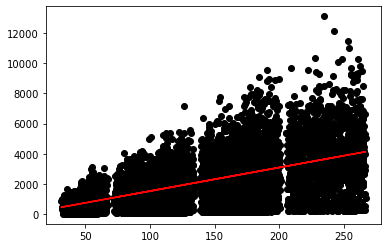

In [52]:
plt.scatter(Market["Item_MRP"],Market["Item_Outlet_Sales"], color='black')
plt.plot(Market["Item_MRP"],model_pred_Sales, color='r')

plt.show()

In [71]:
Market["Item_MRP"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_MRP, Length: 8523, dtype: bool

In [94]:
#Script to find the outliers
for col_name in Market.select_dtypes(include=np.number).columns[2:3]:
    print(col_name)
    q1 = Market[col_name].quantile(0.25)
    q3 = Market[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",Market.loc[(Market[col_name] < low) | (Market[col_name] > high), col_name])

Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)


In [91]:
Market.select_dtypes(include=np.number).columns[2:3]

Index(['Item_MRP'], dtype='object')

In [90]:
Market.iloc[2:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.5,Low Fat,0.01676,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
